# Project Titanic Robert

O conjunto de dados que escolhi para analisar em meu projeto é o **Titanic Data**, que contém dados demográficos e informações 
de 891 dos 2224 passageiros e tripulantes a bordo do Titanic. O objetivo do projeto é fazer uma analise descritiva de algumas  variáveis do dataset, como por exemplo sexo, idade e classe em que o passageiro viajou, e posteriormente averiguar quais fatores fizeram as pessoas sobreviver ao desastre. Por último, realizarei um teste estatistico para inferir, em base esta amostra, se as mulheres são mais propensas a sobreviver que os homens em desastres de similares características.

**Importação das Bibliotecas:**

In [1]:
import pandas as pd # Para criar DataFrames
from scipy.stats import ttest_ind
import numpy as np # Realizar alguns calculos matemáticos
import matplotlib.pyplot as plt # Para criação de gráficos
import seaborn as sns # Design de gráficos mais atraentes
import csv as csv #para ler csv files

In [2]:
#Leitura do arquivo
titanic_df = pd.read_csv('titanic_data.csv')

In [3]:
#Visualização das 10 primeiras linhas do arquivo
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Click no link para descrição das variáveis:**[Link](https://www.kaggle.com/c/titanic/data)

In [4]:
#Tipo de tratamento realizado pela biblioteca Pandas dos dados lançados no Dataframe
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Podemos observar que temos 890 linhas e que as colunas "Age", "Cabin" e "Embarked" contém alguns valores nulos.

In [5]:
#Verificação das colunas númericas para detectar algum erro ou anomalia
titanic_df.describe()

C:\Users\Robert\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Número de nulos no campo "Age"
titanic_df[titanic_df['Age'].isnull()][['PassengerId']].count()

PassengerId    177
dtype: int64

Devido aos valores nulos na coluna "Age" a função describe() retornou alguns valores "NaN" para esta coluna. Como pretendo responder algumas perguntas sobre os sobrevivientes do naufrágio relacionados com essa variável, vou preencher os valores nulos deste campo com a média ou mediana dependendo da distribuição da variável "Age".

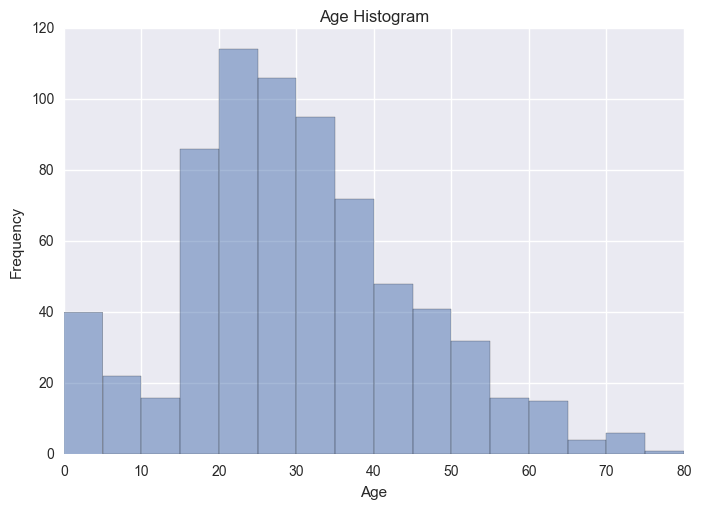

In [7]:
#Distribuição da variável "Age" excluindo os valores nulos
titanic_df['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5)
plt.title('Age Histogram')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

In [8]:
#Valores medianos que serão inseridos para preencher os valores nulos do campo "Age"
titanic_df.groupby(['Sex', 'Pclass']).Age.median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

A primeira linha representa a idade Mediana das mulheres que viajaram na primeira classe e tem uma idade mediana de 35 anos, a segunda linha é a idade mediana de 28 anos para as mulheres que viajaram na segunda classe e a terceira linha representa a idade mediana de 21.5 anos para as mulheres que viajaram na terceira classe. Segue-se a mesma lógica para os homens nas três últimas linhas.

In [9]:
#Criação de uma nova coluna de nome "AgeFill" que conterá os mesmos valores da coluna "Age" porém, 
#posteriormente será preenchido os valores nulos com os valores medianos 
titanic_df['AgeFill'] = titanic_df['Age']

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeFill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [10]:
#Como se observa a coluna "AgeFill" contém os mesmos valores que a coluna "Age", inclusive os valores nulos.
titanic_df[ titanic_df['Age'].isnull() ][['Sex','Pclass','Age','AgeFill']].head(10)

,Sex,Pclass,Age,AgeFill
5,male,3,NaN,NaN
17,male,2,NaN,NaN
19,female,3,NaN,NaN
26,male,3,NaN,NaN
28,female,3,NaN,NaN
29,male,3,NaN,NaN
31,female,1,NaN,NaN
32,female,3,NaN,NaN
36,male,3,NaN,NaN
42,male,3,NaN,NaN


In [11]:
#Preenchimento dos valores nulos da coluna AgeFill com as idades medianas de cada classe por sexo 
titanic_df["AgeFill"].fillna(titanic_df.groupby(['Sex','Pclass'])["Age"].transform("median"), inplace=True)
titanic_df[pd.isnull(titanic_df["Age"])][["Age","AgeFill","Sex","Pclass"]]

,Age,AgeFill,Sex,Pclass
5,NaN,25.0,male,3
17,NaN,30.0,male,2
19,NaN,21.5,female,3
26,NaN,25.0,male,3
28,NaN,21.5,female,3
29,NaN,25.0,male,3
31,NaN,35.0,female,1
32,NaN,21.5,female,3
36,NaN,25.0,male,3
42,NaN,25.0,male,3


Como se observa, os valores nulos da coluna AgeFill foram preenchidos com os valores medianos de cada classe por sexo

In [12]:
#Podemos observar que a função describre não apresenta valores nulos para a variável idade, agora representada pelo campo AgeFill
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeFill
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.112424
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.304424
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400,21.500000
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200,26.000000
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000,36.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


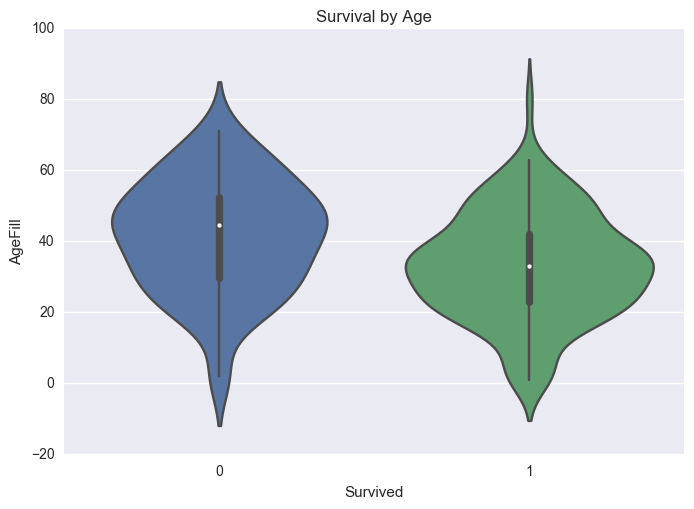

In [13]:
#Gráfico violinplot para ver em que faixa de idade se concentra a maioria dos que sobreviveram e morreram no acidente
data_df = titanic_df.dropna()
ax = sns.violinplot(x="Survived", y="AgeFill", data=data_df)
plt.title('Survival by Age')
plt.show()

Podemos observar que a maioria dos sobreviventes tinham entre 20 e 40 anos enquanto a maioria dos que morreram tinham entre 40 e 60 anos.

In [14]:
#função para agrupar a idade dos passageiros em 5 intervalos e facilitar a visualização e analise dos dados; 
#entre 0 e 12 anos "Child", entre 13 e 17 anos "Teenager", entre 18 e 24 anos "Young Adult, entre 25 e 64 anos "Adult" 
#e finalmente igual ou mais de 65 anos "OAP"
def cutDF(df):
    return pd.cut(df,[0, 13, 18, 25, 65, 120], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'OAP'])

titanic_df['Category'] = titanic_df[['AgeFill']].apply(cutDF)

titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeFill,Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,Adult


**Data Analysis**
Uma vez feita a limpeza e transformação dos dados para facilitar o processo de calculo e plotagem, segue a analise de quais fatores fizeram as pessoas mais propensas a sobreviver dependo do sexo, classe e idade do passageiro. 

A analise dos dados começa investigando quais fatores fizeram a tripulação do Titanic sobreviver dependo do Sexo:

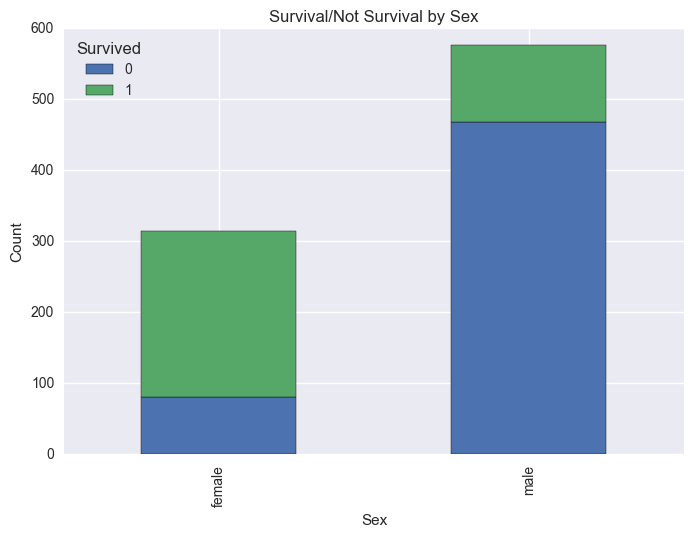

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [15]:
#Criação de gráfico de barras empilhadas onde pode-se obsevar, para cada sexo, os sobreviventes e não sobreviventes.
titanic_df.groupby(['Sex', 'Survived']).size().unstack().plot.bar(stacked=True)
plt.ylabel('Count')
plt.title('Survival/Not Survival by Sex')
plt.show()

sex = titanic_df['Sex']
survived = titanic_df['Survived']
pd.crosstab(sex,survived,normalize ='index')

Podemos observar que aproximadamente 81% dos homens morreram enquanto a **taxa de mortalidade das mulheres foi de aproximadamente 26%,** bem menor que a taxa dos homens. Portanto, já que foram as mulheres que tiveram a menor taxa de mortalidade e o que pretendo responder é quais fatores fizeram as pessoas mais propensas a sobreviver, continuarei a analise do dados pelas "mulheres" analisando em qual entre as tres classes houve uma maior taxa de sobrevivencia de mulheres.

In [16]:
#Função que recebe como parametro a classe que o passageiro viajou e retorna a taxa de sobreviventes mulheres que viajaram 
#na classe dada
def calculate_rate_class(pclass):
    #numerator calcula o total de mulheres que viajaram na classe dada e sobreviveram
    numerator = float(titanic_df[(titanic_df.Sex == 'female') & (titanic_df.Pclass == pclass) & (titanic_df.Survived == 1)].count()['Survived'])
    #denominator calcula o total de mulheres que viajaram na classe dada
    denominator = float(titanic_df[(titanic_df.Sex == 'female') & (titanic_df.Pclass == pclass)].count()['Survived'])
    
    if denominator == 0:
        return "Sem ocorrencias nesta classe"
    else:
        return (numerator / denominator)*100

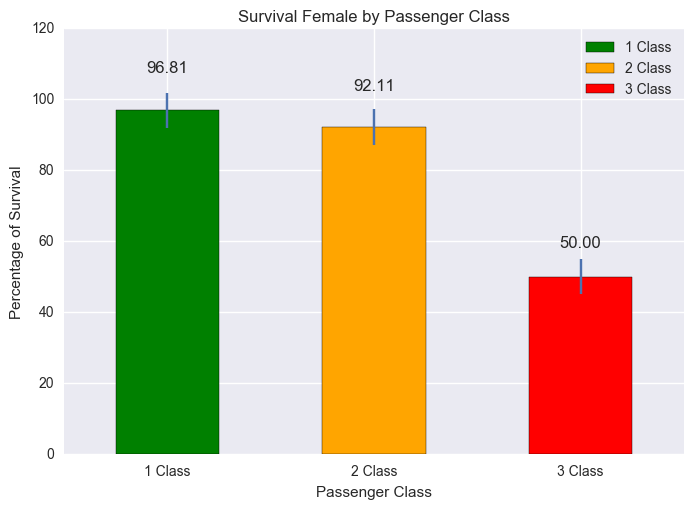

In [17]:
# Dados do eixo Y do gráfico, % de sobreviventes mulheres em cada classe
y_axis = [round(calculate_rate_class(1),2),round(calculate_rate_class(2),2),round(calculate_rate_class(3),2)]

# Corres que serão aplicadas nas barras.
bar_color = ('green','orange','red')

# Conta a variável y_axis, como a mesma possui 3 valores
# serão criados 3 pontos no gráfico.
x_axis = np.arange(len(y_axis))

#largura das barras
width = 0.5

#Legenda dos dados do eixo X do gráfico
legend = ('1 Class', '2 Class','3 Class')

#variavel para criar os eixos 
ax = plt.axes()

"""
Cria as barras onde:
x_axis = São os pontos (1, 2, 3) do eixo x (que será substituído pela legenda).
y_axis = Valores do eixo y.
width = Largura das colunas.
color = A cor que cada barra.
yerr = margem de erro em y (repare que tem uma linha azul no centro
de cada barra) dependendo do valor digitado essa margem aumenta ou diminui.
align = Alinhamento do gráfico se não utilizar este parâmetro
as barras ficam coladas nas bordas do gráfico.
"""

bargraph = ax.bar(x_axis, y_axis, width, color=bar_color, yerr=5, align = 'center')

#Titulo do gráfico
ax.set_title('Survival Female by Passenger Class')

# texto do eixo Y
ax.set_ylabel('Percentage of Survival')

# texto do eixo X
ax.set_xlabel('Passenger Class')

# Cria os pontos do eixo x (1, 2, 3).
# Sem isso a variável legenda fica alinhada a esquerda
# ao invés de ficar no centro da barra.
ax.set_xticks(x_axis)

# Cria a legenda na base das barras.
# 1, 2, 3 = 1 Class, 2 Class, 3 Class
ax.set_xticklabels(legend)

# Laço for fará a leitura e criará cada uma das barras com os parâmetros que foram passados.
for bar in bargraph:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., 1.05*height+5, 
            '%.2f' % (height), 
            ha='center', va='bottom')

# Ativa as linhas de grade no gráfico
plt.grid(True)

# Cria a legenda com as cores e o texto que está
# na variável legenda (canto superior direito do gráfico).
plt.legend(bargraph, legend)

plt.show()

Podemos observar que as mulheres que viajaram na primeira classe apresentaram a menor taxa de mortalidade.
Agora vou analisar a idade das mulheres que viajaram na primeira classe.

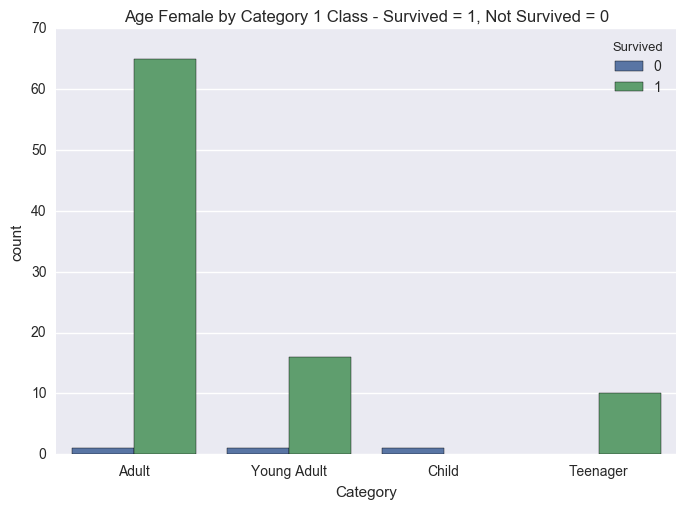

Survived,0,1
Category,,
Adult,0.015152,0.984848
Child,1.000000,0.000000
Teenager,0.000000,1.000000
Young Adult,0.058824,0.941176


In [18]:
#Criação de um dataframe com dados das mulheres que viajaram na primeira classe
titanic_female_df = titanic_df[(titanic_df['Sex'] == 'female')&(titanic_df['Pclass']==1)]
#Gráfico que mostra o número de sobreviventes e não sobreviventes mulheres que viajaram na primeira classe por categoria de idade
ax = sns.countplot(x='Category',hue='Survived',data=titanic_female_df)
plt.title('Age Female by Category 1 Class - Survived = 1, Not Survived = 0')
plt.show()

#Função crosstab para calcular a proporção de sobreviventes e não sobreviventes mulheres por categoria de idade
survived = titanic_female_df.loc[titanic_df['Sex'] == 'female']['Survived']
categoria = titanic_female_df.loc[titanic_df['Sex'] == 'female']['Category']
pd.crosstab(categoria,survived,normalize='index')

Podemos observar que não houve ocorrencias na categoria de idade "OAP" (mais de 65 anos), a categoria "Teenager houve a maior taxa de sobrevivencia, 100%, e que a categoria "Child" apresentou a menor taxa de sobrevivência, 0%.

In [19]:
#Groupby para contar o total de mulheres por categoria de idade que viajaram na primeira classe
titanic_df[(titanic_df.Sex =='female')&(titanic_df.Pclass ==1)].groupby(['Pclass','Category']).PassengerId.count()

Pclass  Category   
1       Adult          66
        Child           1
        Teenager       10
        Young Adult    17
Name: PassengerId, dtype: int64

Como pode-se observar, houve somente uma passageira da categoria de idade "Child" que viajou na primeira classe e não sobreviveu, por este motivo a taxa de sobrevivência é de 0%.

**Conclusão:** Em base a análise descritiva destes dados especificamente, podemos afirmar que o grupo de pessoas que mais sobreviveram a esta catástrofe foram as mulheres, que viajaram na primeira classe e tinham entre 13 e 17 anos. 
No entanto, existem algumas limitações deste análise devido a que podem existir outras variáveis ocultas que estão influenciando os resultados. Com esta analise, busco inferir a variável sobreviveu ou não em base a outras variáveis disponíveis porém, os dados a que temos acesso nunca estão completos. Por exemplo, é possível que quem sobreviveu ou não tenha dependido unicamente do local onde esta pessoa se encontrava no navio no momento do acidente, uma variável oculta que não está no dataset. Uma das consequências de ter valores ausentes é fazer-nos chegar a conclusões equivocadas sobre a analise. Neste caso, o dataset dispõe de somente 891 passageiros quando o barco tinha aproximadamente 1300 passageiros mais a tripulação.
Existe a possibilidade de uma analise mais profunda deste dataset já que, a analise que proponho é bastante sucinta. A variável "Fare", preço da passagem, por exemplo, poderia ser analisada para entender como se relaciona com as demais variáveis do dataset. Também, poderiamos construir outras variáveis a partir das existentes para extrair conclusões, como por exemplo extrair da variável nome o titulo do passageiro, como Mrs ou Miss para determinar as mulheres casadas e solteiras.
Para concluir, vou apresentar um test estatistico com o intuito de fazer inferencia estatistica em base ao conjunto de dados apresentado. Para fazer este test estatistico vou responder a seguinte pergunta: A média de sobreviventes mulheres é igual a média de sobreviventes homens em accidentes de similares caracteristicas considerando este conjunto de dados uma amostra? O test estatistico apropriado para responder a esta pergunta é um constraste de hipoteses utilizando o t test para mostras independentes, neste caso, considerando uma amostra aleatoria para homens e outra amostra aleatoria para mulheres.

In [20]:
#Especificações do t-test:
#Test para amostras independentes
#One tail-test, porque considero que a media de sobreviventes mulheres será maior que a dos homens
#Alpha = 0.05, df = 888, t critical = 1.646
# H0: média de sobreviventes mulheres = média de sobreviventes homens 'hipotese nula'
# H1: média de sobreviventes mulheres > média de sobreviventes homens 'hipotese alternativa'

#Dataframe para amostra das mulheres
data_group1 = titanic_df[titanic_df['Sex'] == 'female']['Survived']
#Dataframe para amostra dos homens
data_group2 =  titanic_df[titanic_df['Sex'] != 'female']['Survived']
#Função para calcular o test t
ttest_ind(data_group1, data_group2)

Ttest_indResult(statistic=19.297816550123351, pvalue=1.4060661308802594e-69)

Em base ao t-statics = 19.3, que é bem maior ao t-critical value = 1.646 para um alpha = 0.05 e one tail test, **não podemos aceitar a hipotese nula em base as duas amostras**, por tanto há uma diferença significativa que podemos prever entre o número médio de mulheres sobrevivientes e o número médio de homens sobreviventes em náufragios de mesmas condições que o Titanic, neste caso e de acordo ao t-test realizado, o número médio de sobreviventes mulheres em naufragios de similares caracteristicas será maior que o número médio de sobreviventes homens.

**Fontes consultadas para realização do projeto:**

[kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

[matplotlib.org](http://matplotlib.org/examples/api/barchart_demo.html)

[usandopython.blogspot](http://usandopython.blogspot.com.br/2015/10/grafico-de-barras-com-python.html)

[felipegalvao.com.br](http://felipegalvao.com.br/blog/2016/03/08/visualizacao-de-dados-com-python-matplotlib/)

[Udacity Discusion Forum](https://discussions.udacity.com/c/nd002-p2-intro-to-data-analysis)